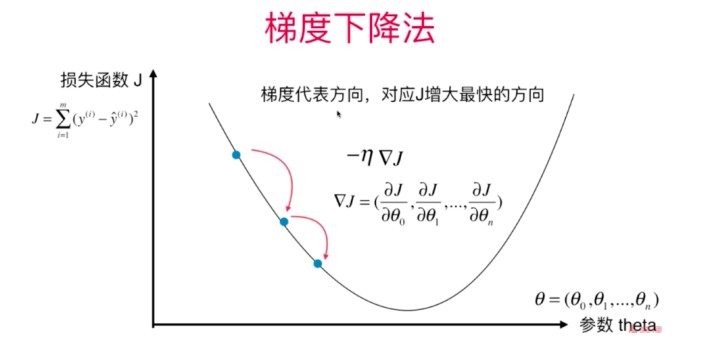

### 在多元线性回归中,使用梯度下降法的原理和步骤

1. 求取 损失函数J的梯度
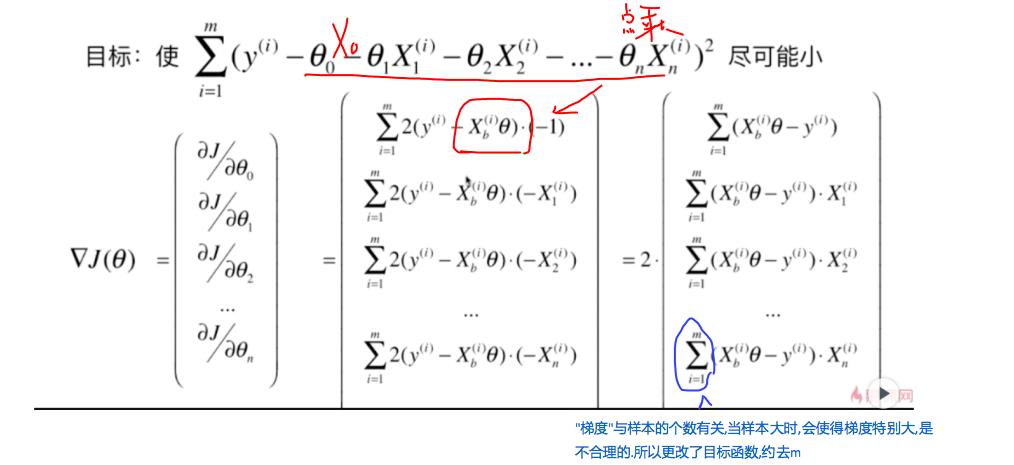

由于对当前损失函数J 求取梯度,会导致梯度各项与 特征向量的个数有关,当样本大时,会造成梯度很大,不合理,所以更改了损失函数J,约去m

2.更改了损失函数J
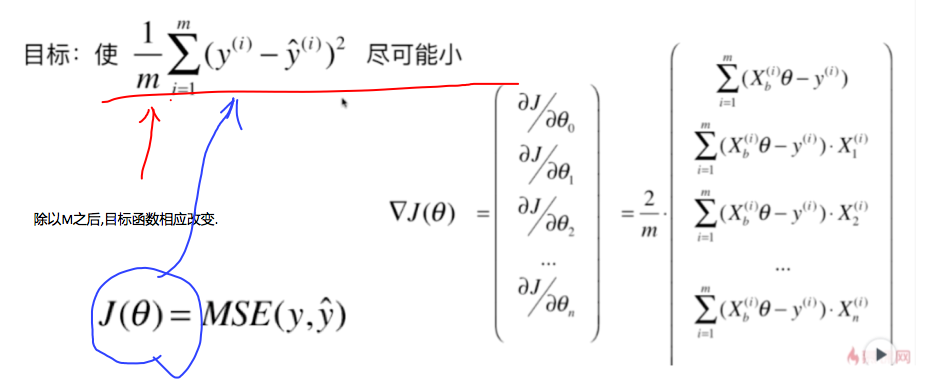

3.将梯度向量化
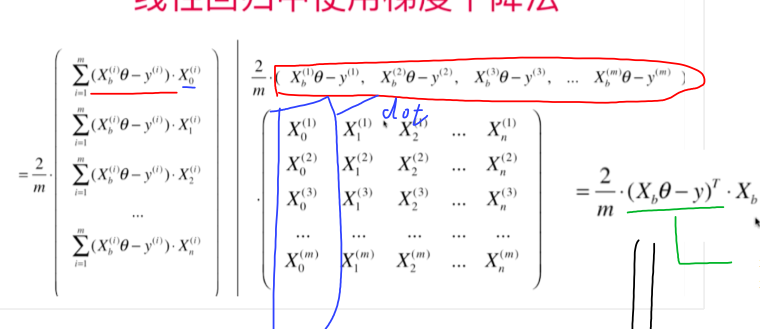

4.数据归一化
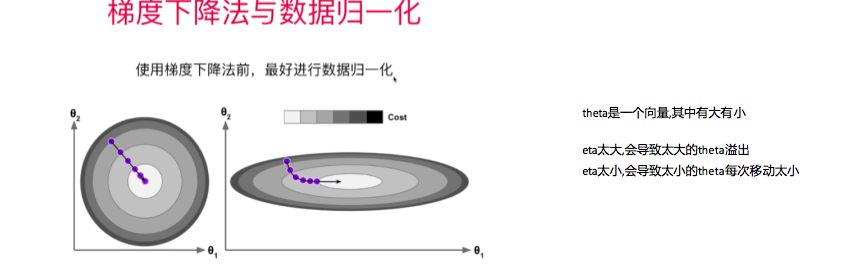

In [1]:
import numpy as np
import matplotlib.pyplot  as plt

In [2]:

#创建初始数据
np.random.seed(666)
x = 2 * np.random.random(size = 100)
y = x *3. + 4. + np.random.normal( size = 100)

In [3]:
# x是向量,转为为X矩阵.升高了维度.
X =x.reshape(-1,1) 

In [4]:
#观察初始数据

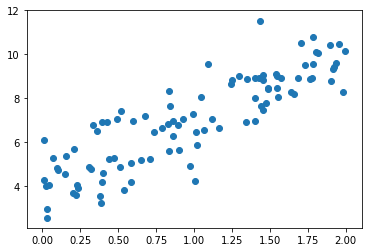

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
def J(theta,X_b,y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    #使用try except 防止损失函数太大
    except:
        return float('inf')
    

In [7]:
def dJ(theta,X_b,y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1,len(theta)):
        # 不是很明白,下一步为什么不用求和,而是直接用矩阵表示
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2/len(X_b)

In [ ]:
def dJ(theta, X_b, y):
    # res = np.empty(len(theta))
    # res[0] = np.sum(X_b.dot(theta) - y)
    # for i in range(1, len(theta)):
    #     res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    # return res * 2 / len(X_b)
    #使用向量化计算
    return X_b.T.dot(X_b.dot(theta) - y) *2.  /len(X_b)

In [8]:
def gradient_descent(X_b,y,initial_theta,eta,n_iters = 1e4,epsilon = 1e-8):

	theta = initial_theta
	#梯度下降当前的次数
	i_iter = 0 
	#由于theta是矩阵,注释掉
	#theta_history.append(initial_theta)

	while i_iter < n_iters:
		gradient = dJ(theta,X_b,y)
		last_theta = theta
		theta = theta - eta * gradient
		#由于theta是矩阵,注释掉
		#theta_history.append(theta)

		if(abs(J(theta,X_b,y)- J(last_theta,X_b,y)) < epsilon):
			break

		i_iter += 1

	return theta

In [9]:
X_b = np.hstack([np.ones((len(X),1)),x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.1
theta = gradient_descent(X_b,y,initial_theta,eta)

In [10]:
theta

array([ 4.02302011,  3.00574511])

## 使用自己封装的算法计算

In [13]:
from  mymodule.LinearRegression import LinearRegression

In [15]:
res_lin = LinearRegression()

In [17]:
res_lin.fit_gd(X,y)

LinearRegression()

In [18]:
res_lin.coef_

array([ 3.00706277])

In [19]:
res_lin.intercept_

4.021457858204859